<a href="https://colab.research.google.com/github/Muadali/MLA_AAD/blob/main/MLA3_AAD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Machine Learning Assignment 3

**Abdifatah Dahiye**

**CS430-ON**

**Machine Learning in the Cloud**

#Support Vector Machine

#Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Specific imports to performing Linear Regression using the SKLearn and statsmodels libraries 




In [ ]:
from sklearn.svm import SVC, SVR, LinearSVC, LinearSVR

imports for building the transformers, the pipeline and spliting the data

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

These imports are for various performance measures to evaluate our model

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc


set the configuration option to display the pipeline diagram

In [ ]:

from sklearn import set_config
set_config(display='diagram')

The function is used to plot the confusion metrics

In [ ]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

#ROC_Curve Function

In [ ]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

#Support vector Machine Classification

Connect to Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#Loading dataframe

In [ ]:

df = pd.read_csv('/content/gdrive/MyDrive/CS430/banknote_authentication.csv')

#3. Statistics and Visual Exploration

In [ ]:
df.head

<bound method NDFrame.head of       variance  skewness  curtosis  entropy  forgery
0      3.62160   8.66610   -2.8073 -0.44699        0
1      4.54590   8.16740   -2.4586 -1.46210        0
2      3.86600  -2.63830    1.9242  0.10645        0
3      3.45660   9.52280   -4.0112 -3.59440        0
4      0.32924  -4.45520    4.5718 -0.98880        0
...        ...       ...       ...      ...      ...
1367   0.40614   1.34920   -1.4501 -0.55949        1
1368  -1.38870  -4.87730    6.4774  0.34179        1
1369  -3.75030 -13.45860   17.5932 -2.77710        1
1370  -3.56370  -8.38270   12.3930 -1.28230        1
1371  -2.54190  -0.65804    2.6842  1.19520        1

[1372 rows x 5 columns]>

In [ ]:
df.tail

<bound method NDFrame.tail of       variance  skewness  curtosis  entropy  forgery
0      3.62160   8.66610   -2.8073 -0.44699        0
1      4.54590   8.16740   -2.4586 -1.46210        0
2      3.86600  -2.63830    1.9242  0.10645        0
3      3.45660   9.52280   -4.0112 -3.59440        0
4      0.32924  -4.45520    4.5718 -0.98880        0
...        ...       ...       ...      ...      ...
1367   0.40614   1.34920   -1.4501 -0.55949        1
1368  -1.38870  -4.87730    6.4774  0.34179        1
1369  -3.75030 -13.45860   17.5932 -2.77710        1
1370  -3.56370  -8.38270   12.3930 -1.28230        1
1371  -2.54190  -0.65804    2.6842  1.19520        1

[1372 rows x 5 columns]>

In [ ]:
df.sample(10)

,variance,skewness,curtosis,entropy,forgery
348,3.10880,3.1122,0.808570,0.43360,0
689,3.02420,-3.3378,2.586500,-0.54785,0
156,2.42260,-4.5752,5.947000,0.21507,0
1208,-1.95510,-6.9756,5.538300,-0.12889,1
607,5.74560,10.1808,-4.785700,-4.33660,0
787,-2.66850,-10.4519,9.113900,-1.73230,1
650,0.21084,9.4359,-0.094543,-1.85900,0
285,1.77470,-6.4334,8.150000,-0.89828,0
597,5.60840,10.3009,-4.800300,-4.35340,0
182,-0.69572,8.6165,1.841900,-4.32890,0


In [ ]:
df.describe()

,variance,skewness,curtosis,entropy,forgery
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


**Dataframe of the count between forgeries and non forgeries**

In [ ]:
import pandas as pd

df = pd.DataFrame({'forgery': [True, False, True, False, False]})
df_forge = df['forgery'].value_counts()
print(df_forge)

False    3
True     2
Name: forgery, dtype: int64


In [ ]:
df_forge = df['forgery'].value_counts()
print(df_forge)

False    3
True     2
Name: forgery, dtype: int64


<Axes: xlabel='Not forgery = 0 forgery = 1', ylabel='Total Number of'>

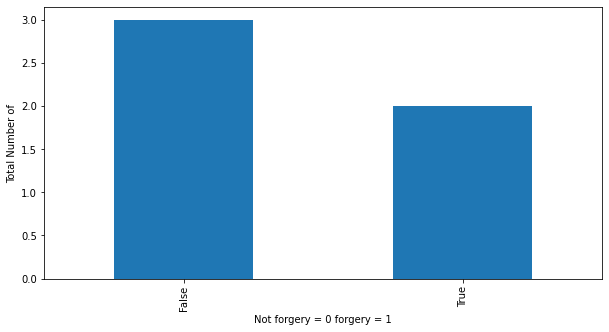

In [ ]:
df_forge.plot(kind="bar", xlabel="Not forgery = 0 forgery = 1", ylabel="Total Number of", figsize=(10,5))

**Creating Pairplot of numerical variables using Seaborn**

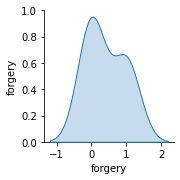

In [ ]:


sns.pairplot(df, diag_kind="kde")

#4. Splitting the data into Train/Test

In [ ]:
import os


os.mkdir('my_dataset')


os.chdir('my_dataset')

In [ ]:
import os


os.mkdir('my_dataset')


os.chdir('my_dataset')

#5. Building the pipeline

In [ ]:
num_attribs = ['variance', 'skewness','curtosis', 'entropy']
     

In [ ]:
from sklearn.preprocessing import MinMaxScaler

col_transform = ColumnTransformer(transformers=[('num', MinMaxScaler(), num_attribs)], remainder='passthrough')



In [ ]:
from sklearn.pipeline import Pipeline

from sklearn.svm import SVC
svc_model = SVC(kernel="linear", C=1, max_iter=100000)

pipeline = Pipeline([
                     ('trans', col_transform),
                     ('SVCLinear', SVC(kernel="linear", C=1, max_iter=100000)),
                     ])

#6. Executing the Model

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=32)


pipeline = Pipeline([
    ('trans', col_transform),
    ('SVCLinear', SVC(kernel="linear", C=1, max_iter=100000)),
])
pipeline.fit(X_train, y_train)

NameError: ignored

#7. Evaluating the Model

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=32)
y_pred = pipeline.predict(X_test)

NameError: ignored

In [ ]:
plot_cm(y_test,y_pred)

NameError: ignored

In [ ]:
print("Precision: ", precision_score(y_test,y_pred))
print("Recall: ", recall_score(y_test,y_pred))
print("F1 Score: ",f1_score(y_test,y_pred))

NameError: ignored

#Conclusion

The model appears to be suitable for predicting whether or not a bank note is a forgery. 

#Problem 2

**Reading Data**

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/CS430/Steel_industry_data.csv')

In [ ]:
df.rename(columns={"Usage_kWh" : "usage_kwh", "Lagging_Current_Reactive.Power_kVarh" : "lag_react_pwr_kvarh", "Leading_Current_Reactive_Power_kVarh" : "lead_react_pwr_kvarh", "Lagging_Current_Power_Factor" : "lag_current_pwr", "Leading_Current_Power_Factor" : "lead_current_pwr", "NSM" : "nsm", "WeekStatus" : "week_status", "Day_of_week" : "day_of_week", "Load_Type" : "load_type"}, inplace=True)

     

#2. Splitting Data into Train/Test

In [ ]:
X = df[['lag_react_pwr_kvarh', 'lead_react_pwr_kvarh','CO2(tCO2)', 'lag_current_pwr', 'lead_current_pwr', 'nsm','week_status', 'day_of_week', 'load_type']]


In [ ]:

y = df['usage_kwh']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.20, random_state=32)

#3-4. Building the Pipeline

In [ ]:
num_attribs = ['lag_react_pwr_kvarh', 'lead_react_pwr_kvarh','CO2(tCO2)', 'lag_current_pwr', 'lead_current_pwr', 'nsm']
cat_attribs = ['week_status', 'day_of_week','load_type']
     

In [ ]:
col_transform = ColumnTransformer(transformers=[ ('cat',OneHotEncoder(), cat_attribs), ('num',MinMaxScaler(), num_attribs),])

In [ ]:
pipeline = Pipeline([('transform', col_transform), 
                     ('SVR', SVR(kernel='linear',  C=50, max_iter=10000000, epsilon=0.0)),])

#5. Executing the Model

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['week_status', 'day_of_week',
                                                   'load_type']),
                                                 ('num', MinMaxScaler(),
                                                  ['lag_react_pwr_kvarh',
                                                   'lead_react_pwr_kvarh',
                                                   'CO2(tCO2)',
                                                   'lag_current_pwr',
                                                   'lead_current_pwr',
                                                   'nsm'])])),
                ('SVR',
                 SVR(C=50, epsilon=0.0, kernel='linear', max_iter=10000000))])

#6. Evaluating the Model

In [ ]:
y_pred = pipeline.predict(X_test)
y_pred_train = pipeline.predict(X_train)

In [ ]:
print(mean_squared_error(y_train, y_pred_train)**(0.5))
print(mean_squared_error(y_test, y_pred)**(0.5))


4.721555937019245
4.810787976330618


#Conclusion

The model appears that SVM Regression model using a linear kernel is a suitable model for making predications on power usage. 